# SEABORN

In [1]:
# chargement des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# chargement du dataset sur les iris
iris = pd.read_csv('iris.csv')

In [3]:
# résumé
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


[]

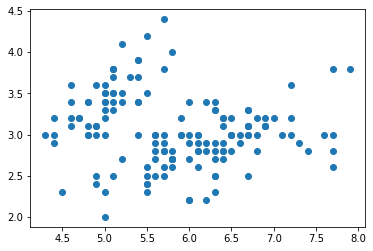

In [4]:
# avec matplotlib on peut visualiser la relation entre la longueur
# du sépal et la largeur du sépal
plt.scatter(iris['sepal_length'],iris['sepal_width'])
plt.plot()
# il manque les axes, pas de titres, pas de couleur pour différencier
# les différents types d'iris
# ==> beaucoup de code pour 1 graphique et pleins de variables dont on
# veut voir la relation ==> utilisation de seaborn.pairplot()

## sns.pairplot()

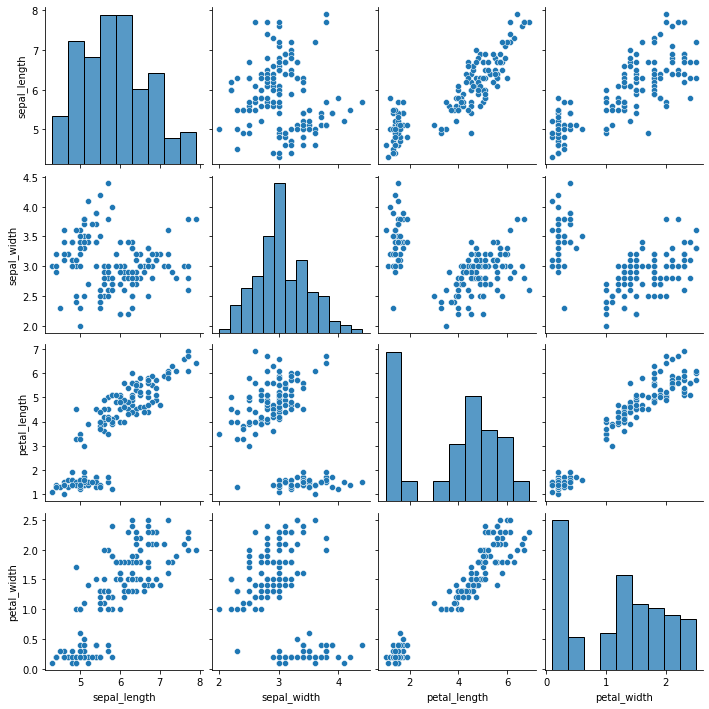

In [5]:
sns.pairplot(iris)
plt.show()
# en 1 ligne, toutes les variables sont analysées + distribution des
# variables pour voir si suit loi normale ou pas

## sns.pairplot(.., hue='...')

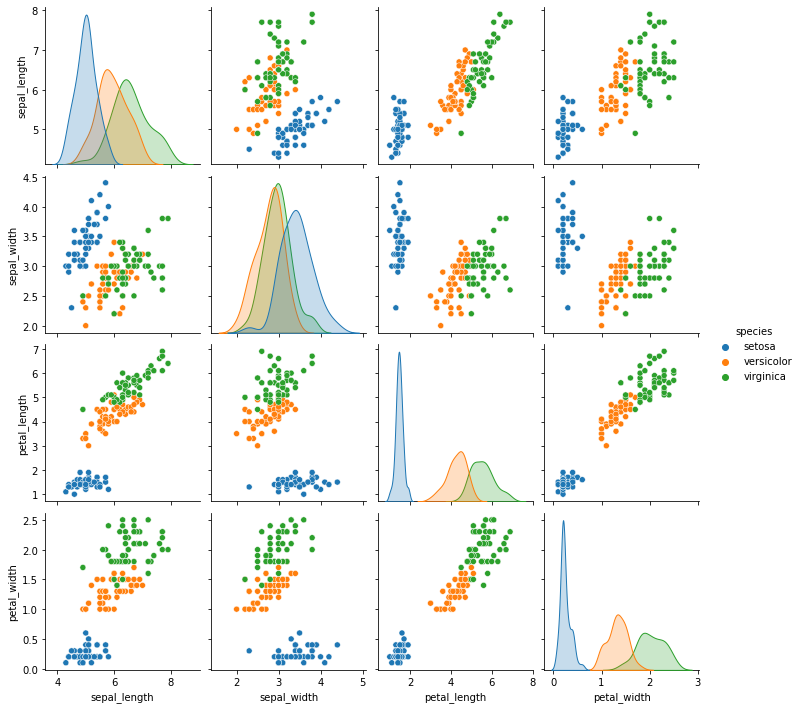

In [6]:
# sns.pairplot(.., hue='...') ==> en couleur selon le type de données(iris)
sns.pairplot(iris, hue='species')
plt.show()
# variété bleue est bien dstanciée eds autres variétés


In [7]:
# cf doc officielle de seaborn
#  avec des exemples de tableau
#  des rangements selon ce que l'on veut : distribution, histogramme..
# et surtout la section API : environ 10 fonstions classées selon
# l'usage qu'on veut en faire...

## QUELQUES FONCTIONNALITES SEABORN

### EXEMPLE DU TITANIC

In [8]:
# chargement du dataset titanic avec seaborn
titanic = sns.load_dataset('titanic')

In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# filtre et nettoyage du dataset titanic
# suppression des colonnes inutiles
titanic.drop(['alone','alive','who','adult_male','embark_town','class'], axis=1, inplace=True)
# suppression des lignes ayant des Nan
titanic.dropna(axis=0, inplace=True) 
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C


In [13]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')

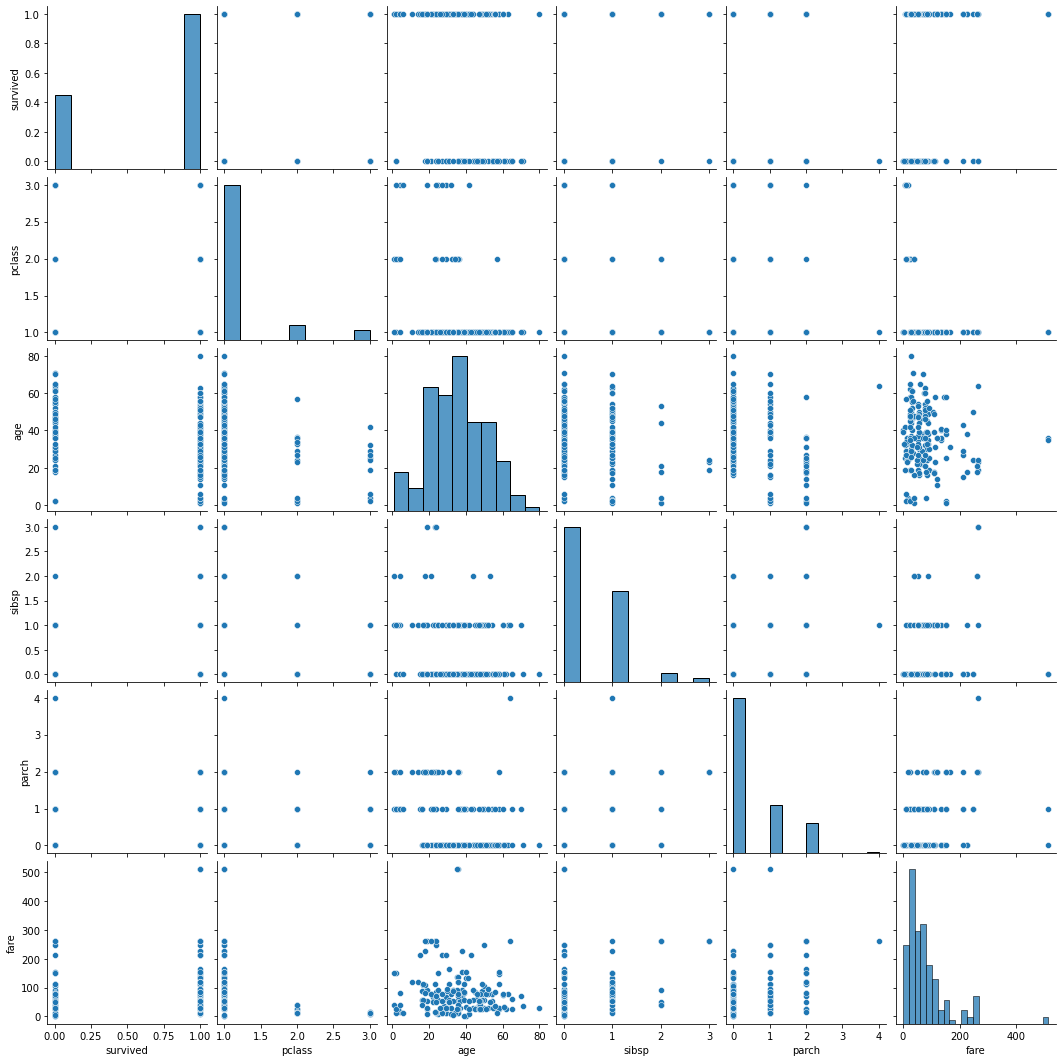

In [12]:
#  affiche les graphs de seaborn pour toutes les variables
sns.pairplot(titanic)
plt.show()
# quelques point ssur le graphique, les points sont alignés
# à cause des variables étant des catégories (classes, sexes...)
# ==> utiliser les fonctions de seaborn de la catégorie

## sns.catplot() : pour dataset bcp catégories

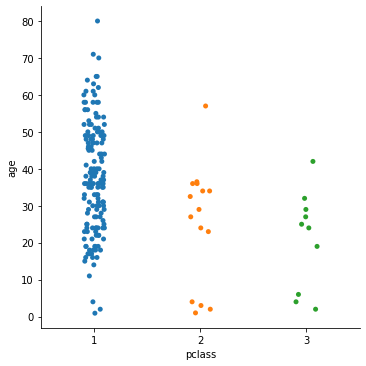

In [18]:
# catplot() : pour analyser un dataset avec beaucoup de catégories
# on veut observer l'âge des passagers en fonction des différentes classes
sns.catplot(x='pclass', y='age', data=titanic)
plt.show()
# mieux

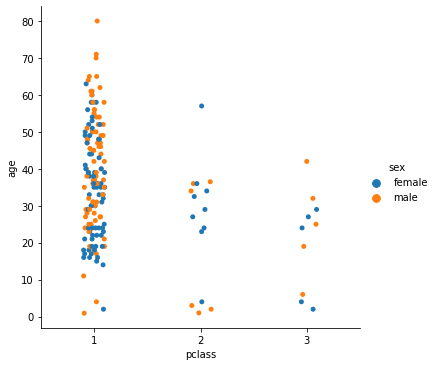

In [19]:
#  en distinguant en plus le sexe : hue='sex'
sns.catplot(x='pclass', y='age', data=titanic, hue='sex')
plt.show()
# age en focntion des classes et sexes

## sns.boxplot()

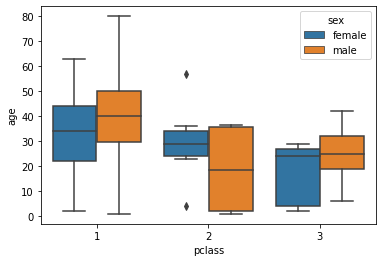

In [20]:
sns.boxplot(x='pclass', y='age', data=titanic, hue='sex')
plt.show()
# 

## sns.distplot() : pour observer des distributions

C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


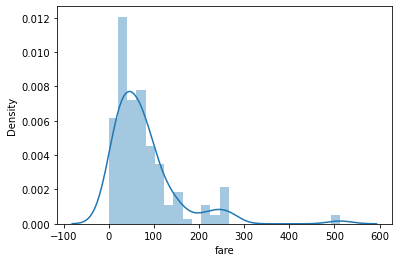

In [21]:
#  pour voir la distribution de la variable tarif (par exemple)
sns.distplot(titanic['fare'])
plt.show()
# le tarif ne suit pas une distribution normale :: plutôt tarif pas cher
# sauf qulques exceptions à la fin du graphique

## sns.jointplot() : voir la distribution selon 2 variables à la fois

C:\Users\Outils\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


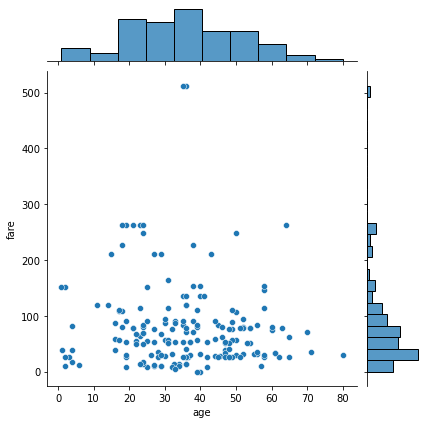

In [24]:
sns.jointplot('age','fare', data=titanic)
plt.show()

## sns.jointplot(.., kind='kde') - style : kernel density estimation

C:\Users\Outils\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


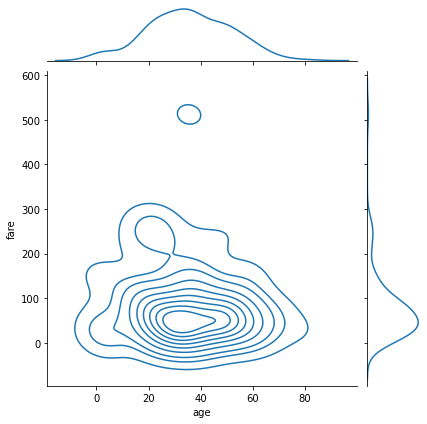

In [25]:
#  pour créer un style dans ce graphique : kind=
sns.jointplot('age','fare', data=titanic, kind='kde')
plt.show()

## sns.jointplot(.., kind='kde') - style : hexagonal

C:\Users\Outils\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


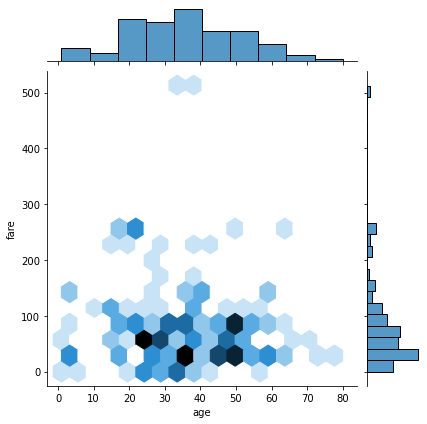

In [26]:
sns.jointplot('age','fare', data=titanic, kind='hex')
plt.show()

## sns.heatmap() : visualiser des matrices 

## sns.heatmap(data.corr()) : visualiser des matrices de corrélations

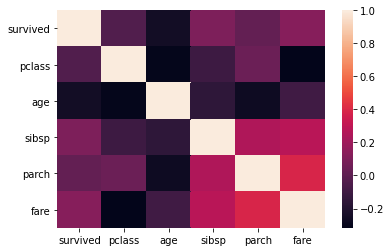

In [29]:
#  voir la matrice de corrélations entre toutes les variables 
sns.heatmap(titanic.corr())
plt.show()

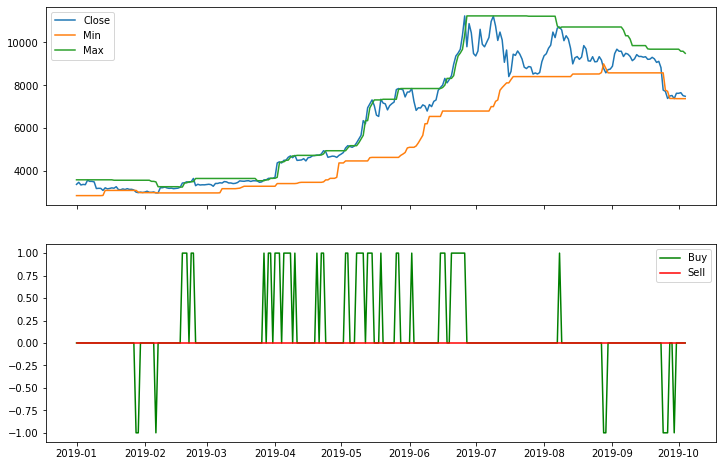

In [32]:
# chargement du dataset
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

# créer une copie du dataframe bitcoin
data=bitcoin.copy()

# ajout d'une colonne 'Buy' remplie de zéros
data['Buy'] = np.zeros(len(data))
# ajout d'une colonne 'Sell' remplie de zéros
data['Sell'] = np.zeros(len(data))

# ajout d'une colonne 'RollingMin' en décalant le signal de 1 jour
#  car sinon bitcoin toujours entre son min et max
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
# ajout d'une colonne 'RollingMax'
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()

# indexing pour écrire 1 si maximum < signal 'Close et -1 sinon
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Buy'] = -1

# tracer sur une figure
start = '2019'
end ='2019'
# Méthode orientée objet pour partager la même abscisse
fig, ax=plt.subplots(2, figsize=(12,8), sharex=True)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['Close', 'Min','Max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['Buy','Sell'])

plt.show()